# Entfernen von Beschriftungen an Bildrändern
Bei der wissenschaftlichen Bildanalyse ist es oft relevant, dass nur vollständig erfasste Objekte im Bild analysiert werden.

In [1]:
import pyclesperanto_prototype as cle
from skimage.segmentation import clear_border, relabel_sequential
from skimage.io import imread
import stackview
import numpy as np

Unser Ausgangspunkt soll ein Beschriftungsbild sein; zum Beispiel abgeleitet von blobs.tif durch Schwellenwertbildung und Kennzeichnung zusammenhängender Komponenten:

c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_imshow.py:34: UserWarning: cle.imshow is deprecated, use stackview.imshow instead.
  warnings.warn("cle.imshow is deprecated, use stackview.imshow instead.")


cl.OCLArray([[ 0,  0,  0, ..., 59, 59, 59],
       [ 0,  0,  0, ..., 59, 59, 59],
       [ 0,  0,  0, ..., 59, 59, 59],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
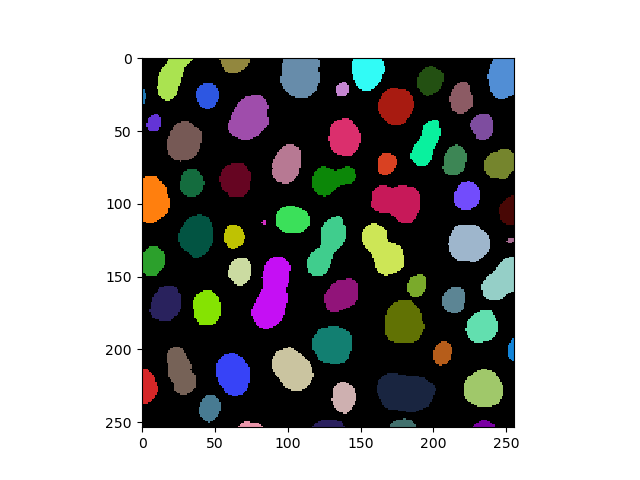

In [2]:
# load data
image = imread('../../data/blobs.tif')

# process the image
blurred = cle.gaussian_blur(image, sigma_x=1, sigma_y=1)
binary = cle.threshold_otsu(blurred)
labeled = cle.connected_components_labeling_box(binary)

# show result
labeled

In [3]:
num_labels = len(np.unique(labeled)) - 1
print("Anzahl der Objekte im Bild: " + str(num_labels))

Number of objects in the image: 62


Falls die Größe der Objekte relevant ist, sollte man die Objekte ausschließen, die nicht vollständig abgebildet wurden und somit den Bildrand berühren.

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
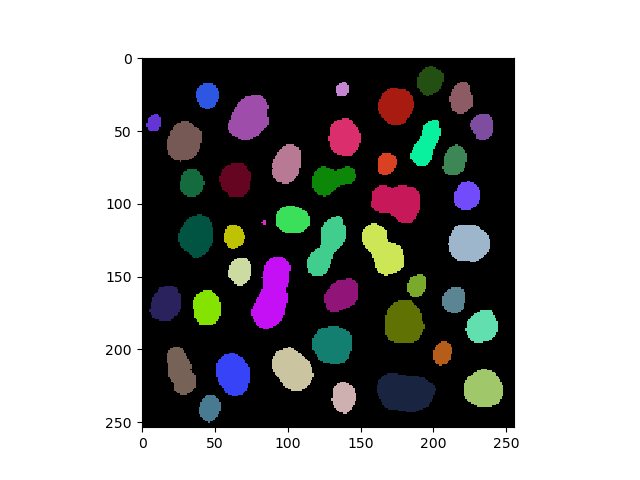

In [4]:
labels_excl_edges = clear_border(np.asarray(labeled))

stackview.insight(labels_excl_edges)

Beachten Sie, dass die maximale Intensität im obigen Beschriftungsbild 55 beträgt und die Anzahl der Objekte 44 ist (siehe unten). Dies ist also ein Beschriftungsbild, in dem nicht alle Beschriftungen zwischen 1 und 44 vorhanden sind.

In [5]:
num_labels = len(np.unique(labels_excl_edges)) - 1
print("Anzahl der Objekte im Bild: " + str(num_labels))

Number of objects in the image: 44


## Anschließende Beschriftung
Viele Algorithmen zur weiteren Verarbeitung von Beschriftungsbildern erfordern, dass die Beschriftungen fortlaufend nummeriert sind. Daher müssen wir dies bei dem obigen Bild korrigieren.

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
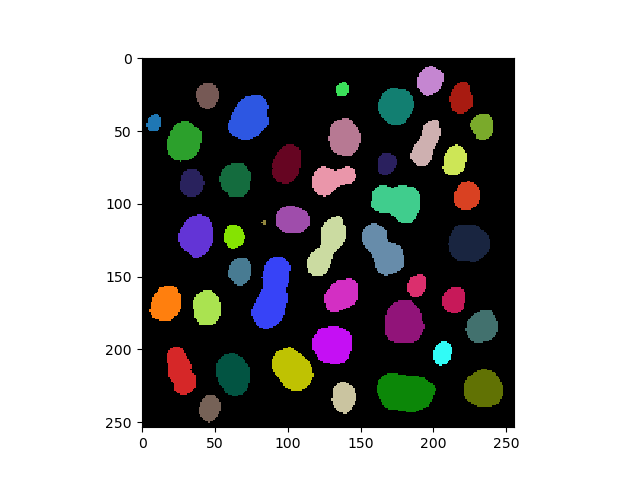

In [6]:
relabeled, _, _ = relabel_sequential(labels_excl_edges)

stackview.insight(relabeled)

Andere Implementierungen zum Entfernen von Objekten an Bildrändern erfordern diesen Schritt nicht:

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
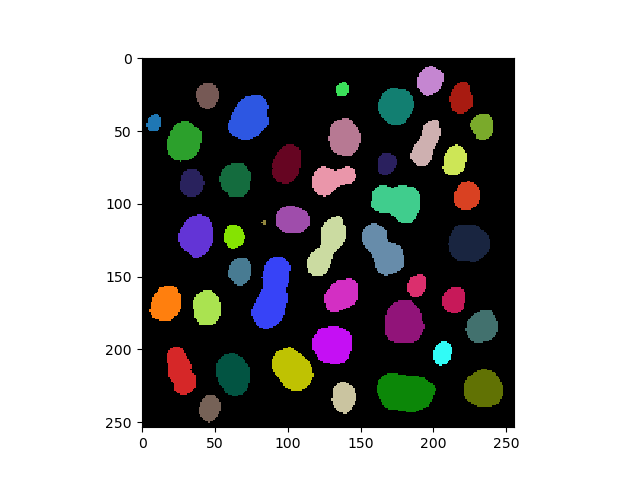

In [7]:
# Exclude Labels On Edges
labels_excl_edges = cle.exclude_labels_on_edges(labeled)

labels_excl_edges

In [8]:
num_labels = len(np.unique(labels_excl_edges)) - 1
print("Anzahl der Objekte im Bild: " + str(num_labels))

Number of objects in the image: 44
